### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,\
log_loss,confusion_matrix
import math
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [2]:
df=pd.read_csv("bank.xls")

In [3]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Checked for null values. no null values. hence, we may proceed.\
We can drop the Id column.

In [5]:
df.drop(['ID'],axis=1,inplace=True)

In [6]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

We downsample the data so that we get equal division of 1 and 0 class

In [7]:
one_class=df[df['Personal Loan']==1]
zero_class=df[df['Personal Loan']==0]

#### Upsampling

In [8]:
from sklearn.utils import resample
one_upsample=resample(one_class,
                     replace=True,
                     n_samples=len(zero_class),
                     random_state=42)
one_upsample.shape

(4520, 13)

In [9]:
data1=pd.concat([one_upsample,zero_class])

In [10]:
data1.shape

(9040, 13)

#### Downsampling

In [11]:
zero_downsample = resample(zero_class,
             replace=True,
             n_samples=len(one_class),
             random_state=42)
zero_downsample.shape

(480, 13)

In [12]:
data=pd.concat([zero_downsample,one_class])

In [13]:
data.shape

(960, 13)

In [14]:
data1['Personal Loan'].value_counts()

1    4520
0    4520
Name: Personal Loan, dtype: int64

In [15]:
data['Personal Loan'].value_counts()

0    480
1    480
Name: Personal Loan, dtype: int64

We will use the downsampled data having 960 rows.

#### A. Neural network with 3 layers-
- Input layer
- Hidden layer
- Output layer


Since it is a binary classification problem, only sngle output node is enough to say if it is 0 or 1.

1. Input Layer- 12 nodes because of 12 features.
2. Hidden Layer- 10 nodes
3. Output Layer- 1 node

Getting the input values and the output for the downsampled data

In [16]:
X=data.drop(['Personal Loan'],axis=1).values
Y=data['Personal Loan'].values

In [17]:
X

array([[ 40.,  16.,  45., ...,   0.,   1.,   0.],
       [ 42.,  15.,  39., ...,   0.,   0.,   0.],
       [ 43.,  17.,  72., ...,   0.,   1.,   0.],
       ...,
       [ 28.,   4., 112., ...,   0.,   1.,   0.],
       [ 46.,  20., 122., ...,   1.,   1.,   1.],
       [ 29.,   5., 135., ...,   1.,   1.,   1.]])

Note that X is an array having the values of the features.\
The index 0 of each of the array inside the 2D array gives the values for feature 1.\
The values inside one array corresponds to the values of that particular entry.

In [18]:
X.shape

(960, 12)

We will have 12 input nodes in our nerual network corresponding to each feature.

In [19]:
X_train,X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Sclaing the data

In [20]:
sc=StandardScaler()

In [21]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Checking if the classes are equally distributed

In [22]:
list(y_train).count(1)

374

In [23]:
list(y_train).count(0)

394

### Network Architecture

Since we have 12 nodes in input layer and 10 nodes in hidden layer, we will need 10 x 12 = 120 weights and 10 biases\
And since we have 10 nodes in hidden layer and 1 node in output layer, we need 10 weights and 1 bias

In [24]:
input_layer = X_train.shape[1]
hidden_layer = 1
output_layer = 1

### Activation Functions

In [25]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [26]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [27]:
def relu(x):
    return np.maximum(0, x)

## Taking a Genetic Algorithm approach

We must have a popultion with weights as chromosome.\
Since we have two weight matrices, we will combine and flatten it to 1D array which will act as a chromosome.\
so **(10 x 12) + 10 + (1 x 10) + 1 = 141 weights** \
This will them be selected, crossover, mutated etc.

Let us have 20 solution/chromosomes in the population

In [28]:
np.random.seed(0)

In [29]:
chromosomes=30
genes=input_layer*hidden_layer+hidden_layer+hidden_layer*output_layer+output_layer

In [30]:
pop_size=(chromosomes,genes)

#generated random numbers between 0 and 1 
population=np.random.rand(chromosomes,genes)

#makes to 0 and 1 interval to -1 to 1
population=2*population-1

In [31]:
population[:1]

array([[ 0.09762701,  0.43037873,  0.20552675,  0.08976637, -0.1526904 ,
         0.29178823, -0.12482558,  0.783546  ,  0.92732552, -0.23311696,
         0.58345008,  0.05778984,  0.13608912,  0.85119328, -0.85792788]])

In [32]:
equation_inputs=X_train

### Forward Propagation

In [33]:
def forward(inputs,weights):
    
    #reshaping the weights
    weight1=np.reshape(weights[:hidden_layer*input_layer],(hidden_layer,input_layer))
    bias1=np.reshape(weights[hidden_layer*input_layer:hidden_layer*input_layer+hidden_layer],(output_layer,hidden_layer))
    weight2=np.reshape(weights[hidden_layer*input_layer+hidden_layer:-1],(output_layer,hidden_layer))
    bias2=np.reshape(weights[-1],(output_layer,output_layer))
    
    #input layer
    A0=inputs
    
    #hidden layer
    Z1=inputs.dot(weight1.T)+bias1
    A1=relu(Z1)
    
    #output layer
    Z2=A1.dot(weight2.T)+bias2
    A2=sigmoid(Z2)
    
    #rounding predictions to 0 , 1
    y_pred=np.round(A2)
    
    return y_pred

Checking the first set of solutions in the population and forward propagating it

In [34]:
list(forward(X_train,population[0])).count(0)

590

In [35]:
list(forward(X_train,population[0])).count(1)

178

In [36]:
accuracy_score(y_train,forward(X_train,population[2]))

0.4635416666666667

The fitness function here calulates the accuracy for the corresponding weights.\
And we try to maximise this fitness value

In [37]:
def fitness_function(inputs,population,y_train):
    fitness=[]
    
    for weights in population:
        y_pred=forward(inputs,weights)
        
        acc=accuracy_score(y_train,y_pred)
        
        fitness.append(acc)
        
    return fitness

In [38]:
fitness_function(equation_inputs,population,y_train)

[0.5989583333333334,
 0.5963541666666666,
 0.4635416666666667,
 0.5130208333333334,
 0.4869791666666667,
 0.4869791666666667,
 0.22526041666666666,
 0.4869791666666667,
 0.4635416666666667,
 0.4869791666666667,
 0.4869791666666667,
 0.4270833333333333,
 0.4869791666666667,
 0.4869791666666667,
 0.5989583333333334,
 0.6575520833333334,
 0.4869791666666667,
 0.5130208333333334,
 0.5130208333333334,
 0.4869791666666667,
 0.6484375,
 0.5130208333333334,
 0.6197916666666666,
 0.4869791666666667,
 0.5572916666666666,
 0.7083333333333334,
 0.4869791666666667,
 0.6901041666666666,
 0.4869791666666667,
 0.4869791666666667]

The select_parents function selects the best performing individuals from a population as parents for the next generation. It does so by repeatedly selecting the individual with the highest fitness until the desired number of parents is reached.

In [39]:
def select_parents(population,fitness,mating_parents):
    
    parents=np.zeros((mating_parents,population.shape[1]))
    
    for parent_num in range(mating_parents):
        
        max_fitness_index=np.where(fitness==np.max(fitness))
        max_fitness_index=max_fitness_index[0][0]
        parents[parent_num,:]=population[max_fitness_index,:]
        fitness[max_fitness_index]=-999999
        
    return parents
    

In [40]:
def crossover(parents, offspring_size, crossover_rate):
    
    offspring = np.empty(offspring_size)

    crossover_point = np.uint8(offspring_size[1] / 2)

    for k in range(offspring_size[0]):
        parent1_index = k % parents.shape[0]
        parent2_index = (k + 1) % parents.shape[0]

        # Generate a random number between 0 and 1
        r = np.random.rand()

        # If random number is less than crossover rate, perform crossover
        if r < crossover_rate:
            offspring[k, 0:crossover_point] = parents[parent1_index, 0:crossover_point]
            offspring[k, crossover_point:] = parents[parent2_index, crossover_point:]
        else:
            offspring[k, :] = parents[parent1_index, :]

    return offspring

In [41]:
def mutation(offspring_crossover, mutation_rate):
    
    # determine how many individuals to mutate based on mutation rate
    num_mutations = int(offspring_crossover.shape[0] * mutation_rate)
    
    # randomly select individuals to mutate
    mutation_indices = np.random.choice(offspring_crossover.shape[0], num_mutations, replace=False)
    
    # apply mutation to selected individuals
    for i in mutation_indices:
        offspring_crossover[i, 4] += np.random.uniform(-1, 1)
        
    return offspring_crossover

In [42]:
generations=15
mating_parents=8

In [43]:
# initialize a list to store the best fitness for each generation
best_fitness = []

for generation in range(generations):

    # the fitness of each chromosome in the population
    fitness=fitness_function(equation_inputs,population,y_train)

    # selecting the best parents for mating
    parents=select_parents(population,fitness,mating_parents)

    # generating the next generation using crossover
    offspring_crossover=crossover(parents,offspring_size=(pop_size[0]-parents.shape[0],genes),crossover_rate=0.85)

    # adding variation to the offsprings
    offspring_mutation=mutation(offspring_crossover,0.3)

    # creating new population   
    population[0:parents.shape[0],:]=parents
    population[parents.shape[0]:,:]=offspring_mutation

    fitness=fitness_function(equation_inputs,population,y_train)
    best_match_index=np.where(fitness==np.max(fitness))

    # append the best fitness to the list
    best_fitness.append(fitness[best_match_index[0][0]])

    print(f"Generation : {generation}\n\
best result after {generation} : {np.round(fitness[best_match_index[0][0]]*100,2)}")

fitness=fitness_function(equation_inputs,population,y_train)
best_match_index=np.where(fitness==np.max(fitness))

print("Best solution fitness : ", fitness[best_match_index[0][0]])


Generation : 0
best result after 0 : 75.91
Generation : 1
best result after 1 : 75.91
Generation : 2
best result after 2 : 75.91
Generation : 3
best result after 3 : 76.3
Generation : 4
best result after 4 : 77.08
Generation : 5
best result after 5 : 77.08
Generation : 6
best result after 6 : 77.08
Generation : 7
best result after 7 : 77.08
Generation : 8
best result after 8 : 77.08
Generation : 9
best result after 9 : 77.08
Generation : 10
best result after 10 : 77.08
Generation : 11
best result after 11 : 77.08
Generation : 12
best result after 12 : 77.08
Generation : 13
best result after 13 : 77.08
Generation : 14
best result after 14 : 77.08
Best solution fitness :  0.7708333333333334


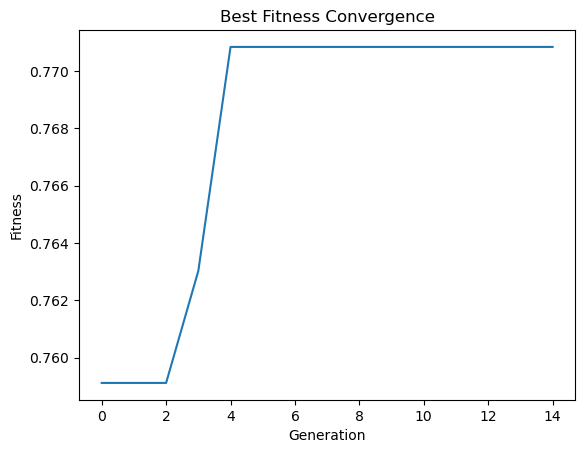

In [44]:

# plot the best fitness for each generation
import matplotlib.pyplot as plt
plt.plot(best_fitness)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Best Fitness Convergence')
plt.show()

Predictions for the training data with the best weights

In [45]:
pred=forward(X_train,population[best_match_index[0][0],:])

In [46]:
print(classification_report(y_train,list(pred)))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       394
           1       0.76      0.78      0.77       374

    accuracy                           0.77       768
   macro avg       0.77      0.77      0.77       768
weighted avg       0.77      0.77      0.77       768



In [47]:
accuracy_score(y_train,pred)

0.7708333333333334

In [48]:
print(confusion_matrix(y_train,pred))

[[299  95]
 [ 81 293]]


Predictions for the test data with the best weights

In [49]:
test_pred=forward(X_test,population[best_match_index[0][0],:])

In [50]:
accuracy_score(y_test,test_pred)

0.78125

In [51]:
print(classification_report(y_test,list(test_pred)))

              precision    recall  f1-score   support

           0       0.73      0.80      0.77        86
           1       0.83      0.76      0.79       106

    accuracy                           0.78       192
   macro avg       0.78      0.78      0.78       192
weighted avg       0.79      0.78      0.78       192



In [52]:
print(confusion_matrix(y_test,test_pred))

[[69 17]
 [25 81]]


## Results

| Activation Function | Hidden Layer | Chromosomes | Generations | Mating Parents | Test Accuracy | Convergence Generation |
|---------------------|--------------|-------------|-------------|----------------|---------------|------------------------|
| Sigmoid             | 7            | 40          | 25          | 10             | 0.7396        | 8th                    |
| Sigmoid             | 10           | 40          | 25          | 10             | 0.6510        | 10th                   |
| Sigmoid             | 10           | 40          | 30          | 10             | 0.7448        | 7th                    |
| None                | 10           | 30          | 20          | 10             | 0.7812        | 13th                   |
| ReLU                | 10           | 30          | 20          | 10             | 0.7760        | 10th                   |
| Tanh                | 10           | 30          | 20          | 10             | 0.7292        | 12th                   |


### Assumptions
    - mating parents : 10
    - crossover rate : 0.85
    - mutation rate : 0.3

## Conclusions

- The choice of activation function can have an impact on the performance of the genetic algorithm optimized neural network.
- In this case, Best accuracy is achieved when there is no activation function associated with hidden layer.
- The choice of hyperparameters is crucial to obtain good results.